# *Entropic Interactions and Phase Transitions*
`Doruk Efe Gökmen -- 27/07/2018 -- Ankara`

The 1-dimensional hard sphere problem is a model where it is possible to illustrate the Asakura-Oosawa depletion interaction which leads to entropic forces causing 1-dimensional hard spheres to get attracted to each other and to the boundaries. 

Slow version: The rejection check is done during the sampling process, hence checks for all possible ${N\choose{2}} =\frac{N(N-1)}{2}$ overlaps.

Populating the interactive namespace from numpy and matplotlib


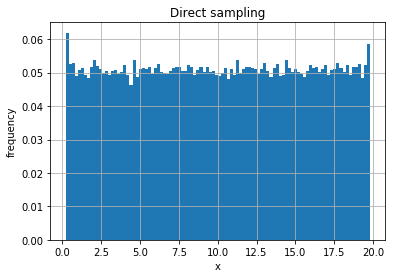

In [44]:
%pylab inline
import random

N = 12 #number of pins
L = 20.0 #length of the line
sigma = 0.2 #half-width of the pins
n_configs = 10000 #sample size

histo_data = []
for config in range(n_configs):
    x = [] #initialise the vector of pin positions (length N)
    while len(x) < N:
        #place the pins at random positions 
        x.append(random.uniform(sigma, L - sigma)) #random number between sigma and L-sigma
        for k in range(len(x) - 1): #check for overlaps
            if abs(x[-1] - x[k]) < 2.0 * sigma: 
                x = [] #tabula rasa in case of overlap
                break
    #print x
    #generate an histogram
    for k in range(N):
        histo_data.append(x[k])
        
pylab.hist(histo_data, bins=100, normed=True)
pylab.xlabel('x')
pylab.ylabel('frequency')
pylab.title('Direct sampling')
pylab.grid()
pylab.savefig('direct_pins_histo.png')
pylab.show()

Faster version: First, sample $N$ random values of x, then sort them, then only need to check for $N-1$  overlaps between neighbouring pairs.

Populating the interactive namespace from numpy and matplotlib


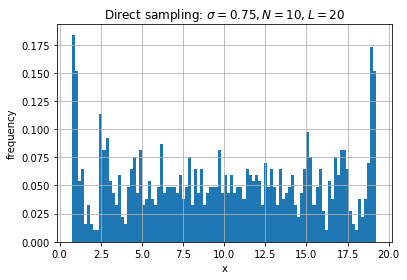

In [18]:
%pylab inline
import random

N = 10
L = 20.0
sigma = 0.75 #half-width of the pins (radius)
n_configs = 100

histo_data = []
for config in range(n_configs):
    while True:
        x = [random.uniform(sigma, L - sigma) for k in range(N)]
        x.sort()
        min_dist = min(x[k + 1] - x[k] for k in range(N - 1))
        if min_dist > 2.0 * sigma:
            #print x
            for k in range(N):
                histo_data.append(x[k])   
            break
pylab.hist(histo_data, bins=100, normed=True)
pylab.xlabel('x')
pylab.ylabel('frequency')
pylab.title('Direct sampling: $\sigma=0.75, N=10, L=20$')
pylab.grid()
pylab.savefig('direct_pins_histo.png')
pylab.show()

Populating the interactive namespace from numpy and matplotlib


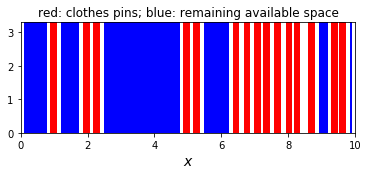

In [3]:
%pylab inline
import random, pylab

N = 15 
L = 10.0
sigma = 0.1
conf = []
while len(conf) < N:
    conf.append(random.uniform(sigma, L - sigma))
    for k in range(len(conf) - 1):
        if abs(conf[-1] - conf[k]) < 2.0 * sigma:
            conf = []
            break

# begin of graphical output
bluesquare = pylab.Rectangle((sigma,0), L -2 * sigma, 0.33 * L, fc='b')
pylab.gca().add_patch(bluesquare)
for pin in conf:
    whiterec = pylab.Rectangle((pin - 2 * sigma, 0), 4 * sigma, 0.33 * L, fc='w', ec='w')
    pylab.gca().add_patch(whiterec)
for pin in conf:
    redrec = pylab.Rectangle((pin - sigma, 0), 2 * sigma, 0.33 * L, fc='r')
    pylab.gca().add_patch(redrec)
pylab.axis('scaled')
pylab.axis('scaled')
pylab.axis([0, L, 0, 0.33 * L])
pylab.xlabel('$x$', fontsize=14)
pylab.title('red: clothes pins; blue: remaining available space')
pylab.savefig('plot-direct_pins-configuration.png')
pylab.show()

Both two algorithms presented so far have very high rejection rates. But we can actually write a rejection free algorithm! We can determine all of the halo (length $\sigma$) and core (length $2\sigma$) regions, and extract those regions from the line of length $L$ to get a deflated line of length $L-2N\sigma$. If the positions of the pins are $x_i$ in the original line, then the positions on the deflated line are denoted by $y_i$, and they are related by $x_i=y_i+(2i+1)\sigma$ (formula for inflating $y_i$'s back into the original configuration). The following plot generates the histogram for the probability distribution $\pi(x)$ of pin centers and the pair correlation function $\pi(x,y)$ of the pin centers, i.e. the distribution of $|x-y|$ where $x$ and $y$ are positions of a pair of pins.

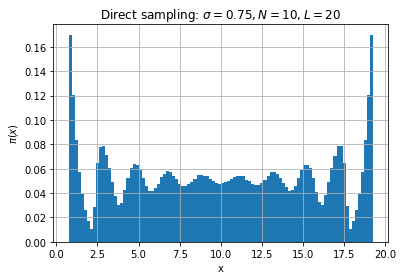

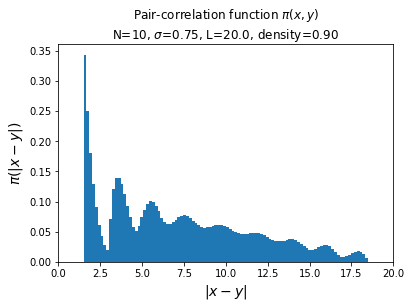

In [63]:
import random

N = 10 #number of pins
L = 20.0 #length of the line
sigma = 0.75 #half-width of the pins
n_runs = 100000

histo_data, pair_corr = [], []
for run in range(n_runs):
    y = [random.uniform(0.0, L - 2 * N * sigma) for k in range(N)] #choose random numbers in deflated line
    y.sort()
    #print [y[i] + (2 * i + 1) * sigma for i in range(N)] #print the original configuration by inflating backs
    for k in range(N):
        histo_data.append(y[k] + (2 * k + 1) * sigma) #construct the histogram
    #pair correlation function:
    pair_corr += [abs(y[i] + (2 * i + 1) * sigma - (y[j] + (2 * j + 1) * sigma)) for i in xrange(N) for j in xrange(i)] 
#figure output for the histogram
#probability distribution pi(x)
pylab.hist(histo_data, bins=100, normed=True)
pylab.xlabel('x')
pylab.ylabel('$\pi(x)$')
pylab.title('Direct sampling: $\sigma=0.75, N=10, L=20$')
pylab.grid()
pylab.savefig('direct_pins_histo_no_reject.png')
pylab.show()
#pair correlation function pi(x,y)
histo, bins, patches = pylab.hist(pair_corr, bins=100, normed=True)
pylab.xlim(0.0, L)
pylab.title('Pair-correlation function $\pi(x,y)$\nN=%i, $\sigma$=%.2f, L=%.1f, density=%.2f' % (N, sigma, L, density))
pylab.xlabel('$|x-y|$', fontsize=14)
pylab.ylabel('$\pi(|x-y|)$', fontsize=14)
pylab.savefig('plot-pins_noreject_periodic-N%04i-L%.1f-pair_corr.png' % (N, L))
pylab.show()

The above plots correspond to the parameters $\sigma=0.75$, $N=10$ and $L=20$. The intriguing distribution of probability for the pin center locations is due to the entropic forces (Asakura-Oosawa depletion interaction). In addition to the oscillatory behaviour, here we see that close to the poles, there are 4 times more pins compared to the center. This implies that the poles "attract" the pins. Furthermore, the entropic forces induce mutual attraction between the pins, as well.

The sorting trick that is used to fully eliminate rejection probabilities in the previous section can also be used to calculate the partition function $Z(\eta)$ analytically. It is found that the partition function has a simple expression: $Z(\eta)=[L(1-\eta)]^N$ for $0<\eta<1$. Moreover, the exact probability distribution of the pin center positions $\pi(x)$ is straightforwardly obtained from $Z(\eta)$. The evaluation and the plot of $\pi(x)$ is done by the following code. Here, the result indicates that the same distribution from the previous runs of direct sampling is retained and verified.

Populating the interactive namespace from numpy and matplotlib


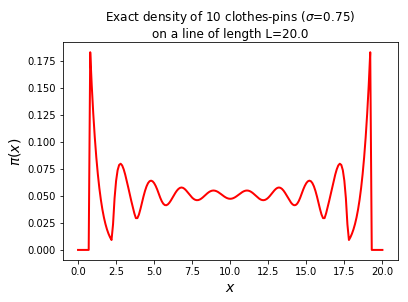

In [39]:
%pylab inline
import pylab

def binomialCoeff(n, k):
    result = 1
    for i in range(1, k+1):
        result = result * (n-i+1) / i
    return result

def Z(N, L, sigma):
    freespace = L - 2.0 * N * sigma
    if freespace > 0.0:
        result = freespace ** N
    else:
        result = 0.0
    return result

def pi(x, N, L, sigma):
    tot = 0.
    for k in range(0, N):
        Z1 = Z(k, x - sigma, sigma)
        Z2 = Z(N - k - 1, L - x - sigma, sigma)
        tot += binomialCoeff( N - 1, k) * Z1 * Z2
    Ztotal = Z(N, L, sigma)
    return tot / Ztotal

L = 20.0
N = 10
sigma = 0.75
xr = pylab.linspace(0.0, L, 201)
yr = [pi(x, N, L, sigma) for x in xr]
pylab.plot(xr, yr, 'red', linewidth=2.0)
pylab.xlabel('$x$', fontsize=14)
pylab.ylabel('$\pi(x)$', fontsize=14)
pylab.title('Exact density of %i clothes-pins ($\sigma$=%s)\non a line of length L=%s' % (N, sigma, L))
pylab.savefig('plot-direct_pins_density.png')
pylab.show()

The oscillatory behaviour is due to the poles. We now put the pins not on a line but instead on a circle of length $L$. Then this implies that, despite having the same parameters $\sigma=0.75$, $N=10$ and $L=20$, if we use periodic boundary conditions, we obtain a flat, uniform probability distribution $\pi(x)$ as seen in the following figure. But this does not imply that there are no correlations between the pins.

Populating the interactive namespace from numpy and matplotlib


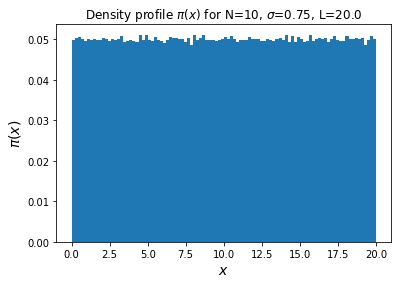

In [49]:
%pylab inline
import random, pylab

N = 10 #number of pins
L = 20.0 #length of the circle
sigma = 0.75 #half-width of the pins (radius)
n_runs = 100000 #number of samplings
data = []
for run in range(n_runs):
    #Assume that a pin is placed on the circle, 
    #the allowed region for the next pins if a pin is placed on the circle is Lprime=L-2 sigma
    Lprime = L - 2.0 * sigma
    #generate N-1 random numbers in the deflated circle (no rejection range) 
    y_sorted = [random.uniform(0, Lprime - 2.0 * (N - 1) * sigma) for k in range(N - 1)] 
    y_sorted.sort() #and sort them
    #generate the sample by inflating the circle back to the original size
    sample = [y_sorted[k] + (2.0 * k + 1.0) * sigma for k in range(N - 1)] + [L - sigma] 
    shift = random.uniform(0, L) #generate a random shift of value between 0 and L
    #shift the sampling by a random amount between 0, L modulo L to generate the next sample
    data += [(y + shift) % L for y in sample] #list all samples from each sampling in the data file
#figure output    
pylab.title('Density of %i clothes-pins ($\sigma$=%s) on a line of length L=%s' % (N, sigma, L))
pylab.xlabel('$x$', fontsize=14)
pylab.ylabel('$\pi(x)$', fontsize=14)
pylab.title('Density profile $\pi(x)$ for N=%i, $\sigma$=%.2f, L=%.1f' % (N, sigma, L))
pylab.hist(data, bins=100, normed=True)
pylab.savefig('plot-pins_noreject_periodic-N%04i-L%.1f-density.png' % (N, L))
pylab.show()

To study the correlations between the pairs, we use the pair correlation function $\pi(x,y)$ which is the probability of having a pin at position $x$ and another pin at position $y$. $\pi(x,y)$ can be obtained by generating the histogram of $|x-y|$. 

On the other hand, observe that we can regard the pin at position $x$ as a *pole* for the rest of the $N-1$ pins including the one at position $y$. Therefore, we can regard the pair correlation function for $N$ pins of width $2\sigma$ on a ring of length $L$ as a probability distribution of $N-1$ pins on a line of length $L-2\sigma$. More precisely, $\pi_{N,L}(x,y)=\pi_{N-1,L-2\sigma}(|x-y|-\sigma)$.

Observe, that $\pi(x,y)$ is consant if there are no correlations in the system. The following code computes and plots $\pi(x,y)$. Analytical plot using the above reasoning is also given.

Populating the interactive namespace from numpy and matplotlib


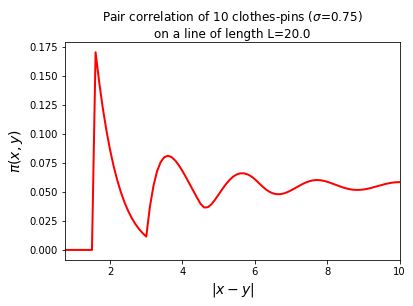

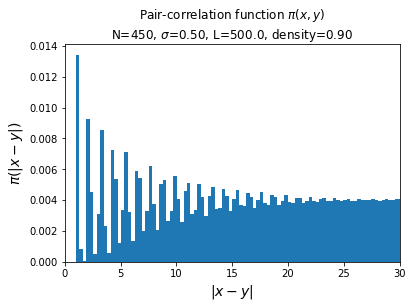

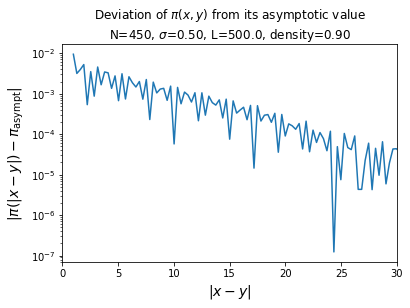

In [86]:
%pylab inline
import random, pylab

N = 10 #number of pins
L = 20.0 #length of the circle
sigma = 0.75 #half-width of the pins

#analytical result
def binomialCoeff(n, k):
    result = 1
    for i in range(1, k+1):
        result = result * (n-i+1) / i
    return result

def Z(N, L, sigma):
    freespace = L - 2.0 * N * sigma
    if freespace > 0.0:
        result = freespace ** N
    else:
        result = 0.0
    return result

def pi(x, N, L, sigma):
    tot = 0.
    for k in range(0, N):
        Z1 = Z(k, x - sigma, sigma)
        Z2 = Z(N - k - 1, L - x - sigma, sigma)
        tot += binomialCoeff( N - 1, k) * Z1 * Z2
    Ztotal = Z(N, L, sigma)
    return tot / Ztotal

xr = pylab.linspace(0.0, L, 201)
yr = [pi(x - sigma, N -1, L - 2*sigma, sigma) for x in xr]
pylab.plot(xr, yr, 'red', linewidth=2.0)
pylab.xlim(sigma, 10)
pylab.xlabel('$|x-y|$', fontsize=14)
pylab.ylabel('$\pi(x,y)$', fontsize=14)
pylab.title('Pair correlation of %i clothes-pins ($\sigma$=%s)\non a line of length L=%s' % (N, sigma, L))
pylab.savefig('plot-pins_noreject_periodic-N%04i-L%.1f-pair_corr_analytic.png' % (N, L))
pylab.show()

#define the modular distance between two points x1 and x2
def dist(x1, x2, L):
    d_x = abs(x1 - x2) 
    return min(d_x, L - d_x)

N = 450
L = 500.0
sigma = 0.5
density = N * 2.0 * sigma / L
n_runs = 100
x_max = 30.0  # maximum of the histogram range
data, pair_corr = [], []
for run in range(n_runs):
    Lprime = L - 2.0 * sigma
    y_sorted = [random.uniform(0, Lprime - 2.0 * (N - 1.0) * sigma) for k in xrange(N - 1)]
    y_sorted.sort()
    sample = [y_sorted[k] + (2.0 * k + 1.0) * sigma for k in xrange(N - 1) ] + [L - sigma]
    pair_corr += [dist(sample[i], sample[j], L) for i in xrange(N) for j in xrange(i)]
histo, bins, patches = pylab.hist(pair_corr, bins=800, normed=True)
pylab.xlim(0.0, x_max)
pylab.title('Pair-correlation function $\pi(x,y)$\nN=%i, $\sigma$=%.2f, L=%.1f, density=%.2f' % (N, sigma, L, density))
pylab.xlabel('$|x-y|$', fontsize=14)
pylab.ylabel('$\pi(|x-y|)$', fontsize=14)
pylab.savefig('plot-pins_noreject_periodic-N%04i-L%.1f-pair_corr.png' % (N, L))
pylab.show()
pylab.clf()
asymptotic_val = 1.0 / (L / 2.0)   # asymptotic value of the pair correlation function
pylab.semilogy(bins[:-1], [abs(y - asymptotic_val) for y in histo])
pylab.xlim(0.0, x_max)
pylab.title('Deviation of $\pi(x,y)$ from its asymptotic value\nN=%i, $\sigma$=%.2f, L=%.1f, density=%.2f' % (N, sigma, L, density))
pylab.xlabel('$|x-y|$', fontsize=14)
pylab.ylabel('$|\pi(|x-y|)-\pi_\mathrm{asympt}|$', fontsize=14)
pylab.savefig('plot-pins_noreject_periodic-N%04i-L%.1f-pair_corr_deviation.png' % (N, L))
pylab.show()



It is seen that the pair correlations oscillate in an envelope that decays to constant at large distances, i.e. the system is homogeneous beyond a certain correlation length, which is characteristic of liquids. There are no phase transitions in this system.

Now, we go back to the *hard disks model* (with periodic boundary conditions) in order to investigate phase transitions. To get a well "thermalised" configuration, run the following program for a couple of times.

Populating the interactive namespace from numpy and matplotlib
starting from file disk_configuration_N64_eta0.72.txt


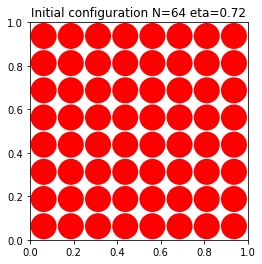

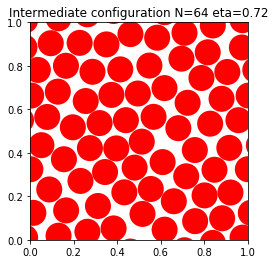

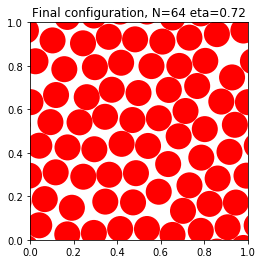

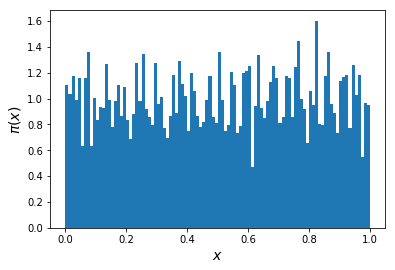

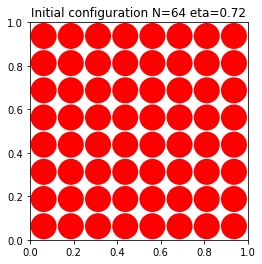

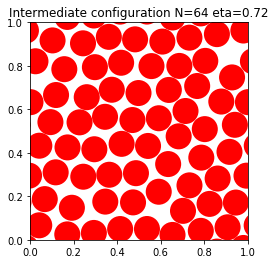

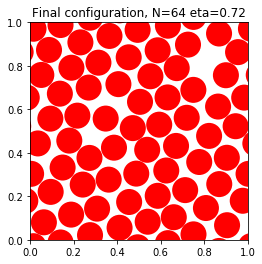

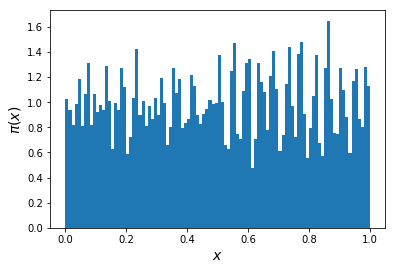

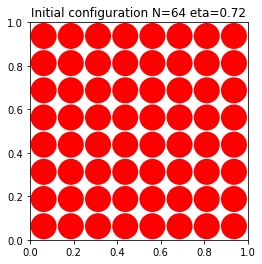

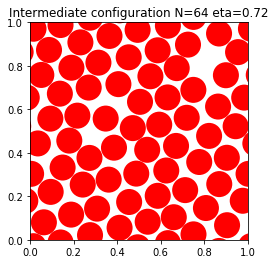

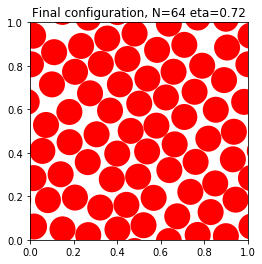

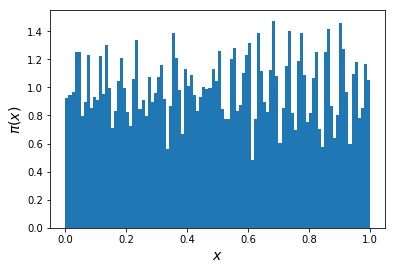

In [99]:
%pylab inline
import random, math, cmath, pylab, os

#Introduce the periodic boundary conditions via the modular distance function between two 2D vectors x, y:
def dist(x,y):
    d_x = abs(x[0] - y[0]) % 1.0 #distance between the first compononents of two vectors in modulo 1
    d_x = min(d_x, 1.0 - d_x) #the modular distance is the minimum of cases due to periodicity
    d_y = abs(x[1] - y[1]) % 1.0 #distance between the second compononents of two vectors in modulo 1
    d_y = min(d_y, 1.0 - d_y)
    return  math.sqrt(d_x**2 + d_y**2) #returns the modular distance

#Define the integer square root function (to use in range() function)
def isqrt(n):
    i = int(math.sqrt(n) + 0.5)
    if i**2 == n:
        return i
    raise ValueError('input was not a perfect square')

#markov-chain sampling for 4 hard disks with periodic boundary conditions
def markov_disks(L, delta, sigma):
    condition = True #initialise the condition of overlap as True
    while condition == True:
        a = random.choice(L)
        b = [(a[0] + random.uniform(-delta, delta)) % 1.0, (a[1] + random.uniform(-delta, delta)) % 1.0]
        min_dist = min(dist(b, c) for c in L if c != a)
        if not min_dist < 2.0 * sigma:
            a[:] = b
            condition = False #overlap condition is false, i.e. there is no overlap
            break
    return L

#Inputs of the markov_disks_box function:
N = 64 #number of disks
eta = 0.72 #disk density
sigma = math.sqrt(eta / N / math.pi) #radius
delta = 0.3 * sigma
#Obtain the initial disk configuration L from a file if it exists; otherwise generate it.
filename = 'disk_configuration_N%i_eta%.2f.txt' % (N, eta)
if os.path.isfile(filename): #Returns True if "filename" is an existing regular file.
    f = open(filename, 'r')
    L = []
    for line in f:
        a, b = line.split()
        L.append([float(a), float(b)])
    f.close()
    print 'starting from file', filename
else:
    delxy = 1 / math.sqrt(N) / 2
    L = [[delxy + i * 2 * delxy, delxy + j * 2 * delxy] for i in range(isqrt(N)) for j in range(isqrt(N))]
    print 'starting from a new configuration'
    
n_steps = 10000 #number of steps
n_runs = 3 #number of steps
hist_data = [] #initialise the histogram data

#Figure output:
def show_conf(L, sigma, title, fname):
    pylab.axes()
    for [x, y] in L:
        #the following loops generate 6 disks on a square grid to implement periodic boundary conditions
        for ix in range(-1, 2):
            for iy in range(-1, 2):
                cir = pylab.Circle((x + ix, y + iy), radius=sigma,  fc='r')
                pylab.gca().add_patch(cir)
    pylab.axis('scaled')
    pylab.title(title)
    pylab.axis([0.0, 1.0, 0.0, 1.0])
    pylab.savefig(fname)
    pylab.show()
    pylab.close()   

for run in range(n_runs):
    pylab.clf()
    #draw the initial configuration
    L_in = [[delxy + i * 2 * delxy, delxy + j * 2 * delxy] for i in range(isqrt(N)) for j in range(isqrt(N))] #initial configuration 
    show_conf(L_in, sigma, 'Initial configuration N=%i eta=%.2f' % (N, eta), 'initial_configuration_N%i_eta%.2f.png' % (N, eta)) 
    if L != L_in:
        #draw the intermediate configuration
        show_conf(L, sigma, 'Intermediate configuration N=%i eta=%.2f' % (N, eta), 'initial_configuration_N%i_eta%.2f.png' % (N, eta)) 
    for step in range(n_steps):
        #pylab.clf()
        #show_conf(L, sigma, 'Sample Configuration', 'disks.png')
        markov_disks(L, delta, sigma)
        for k in range(N):
            hist_data.append(L[k][0]) #generate the histogram
        #print 'run',run
        #print config
        #print     
    #draw the final configuration        
    show_conf(L, sigma, 'Final configuration, N=%i eta=%.2f' % (N, eta), 'final_configuration_N%i_eta%.2f.png' % (N, eta)) 
    
    #Histogram for the x positions:
    pylab.xlabel('$x$', fontsize=14)
    pylab.ylabel('$\pi(x)$', fontsize=14)
    pylab.hist(hist_data, bins=100, normed=True)
    pylab.show()

    #Write the final configuration on a file:
    f = open(filename, 'w')
    for a in L:
       f.write(str(a[0]) + ' ' + str(a[1]) + '\n')
    f.close()

Here, for $\eta=0.72$ it is seen that although the system tends towards disordered configurations for lower densities, here remarkably, the system remains more or less ordered. In fact, the system resulted in a configuration that is more similar to a hexagonal lattice than a square lattice. This is interesting since the 2D hexagonal lattice corresponds to a stable solid crystal.

### *Melting*
As it will now be seen, $\eta\approx0.72$ is the critical density for this system. This stable hexagonal configuration undergoes a phase transition and "dissolves" into disordered configurations at lower densities. To see this, let us calculate the local and global order parameters, $\psi_{6,k}$ and $\Psi_6$ respectively, whilst slowly reducing the density during the simulation (or more precisely, sampling).

Populating the interactive namespace from numpy and matplotlib
starting from file disk_configuration_N64_eta0.72.txt


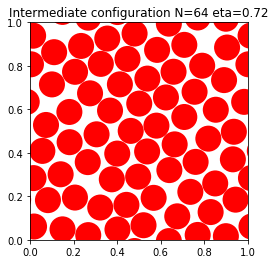

0.618183080704
1 0.7


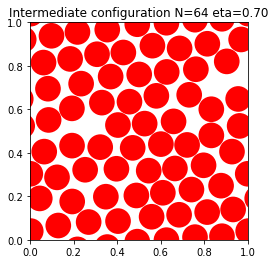

0.455313530544
2 0.68


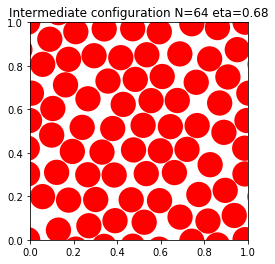

0.346054695035
3 0.66


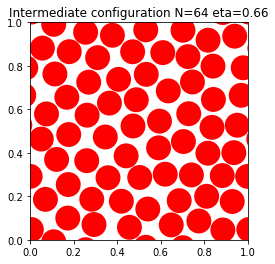

0.211161207498
4 0.64


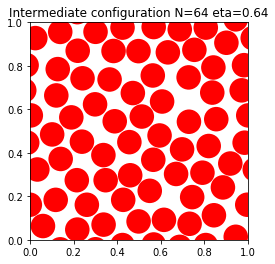

0.186821399237
5 0.62


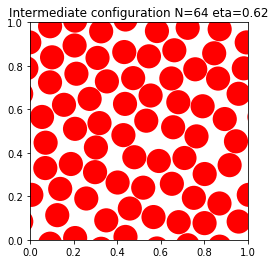

0.21416162812
6 0.6


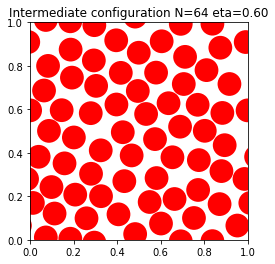

0.137563117184
7 0.58


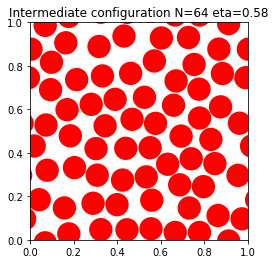

0.139730640319
8 0.56


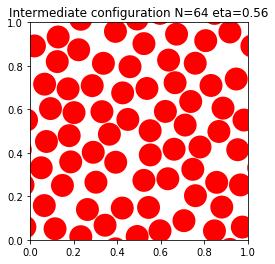

0.147521809057
9 0.54


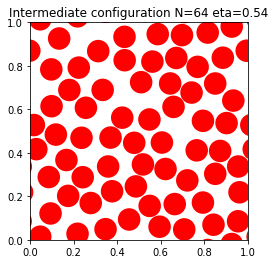

0.137326363986
10 0.52


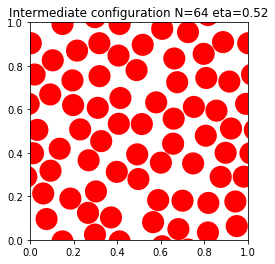

0.105903962121
11 0.5


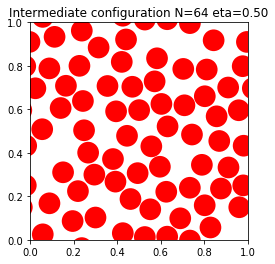

0.107811696621
12 0.48


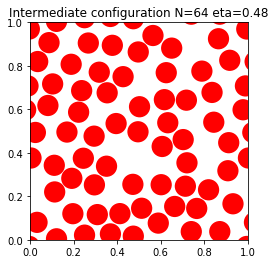

0.112889415541
13 0.46


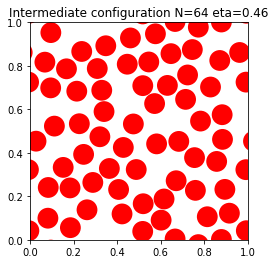

0.115936260016
14 0.44


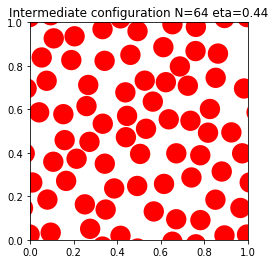

0.117162408006
15 0.42


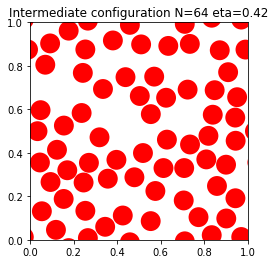

0.114355378337
16 0.4


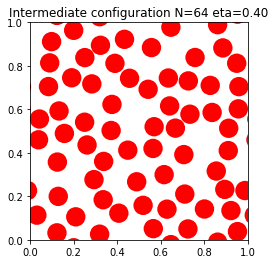

0.105573105587
17 0.38


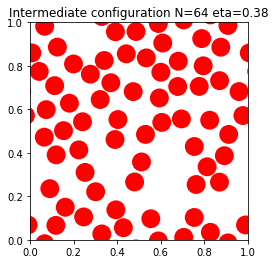

0.114498376066
18 0.36


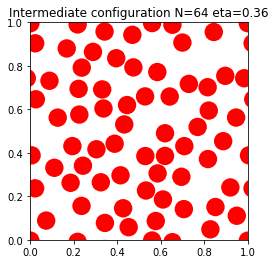

0.113356957805
19 0.34


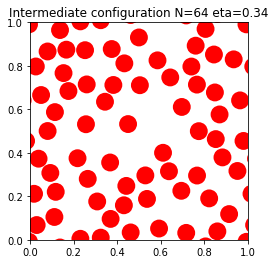

0.130247455979
20 0.32


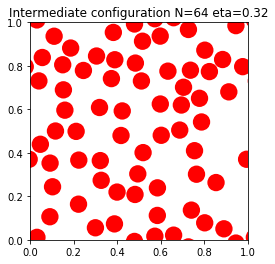

0.119705179367
21 0.3


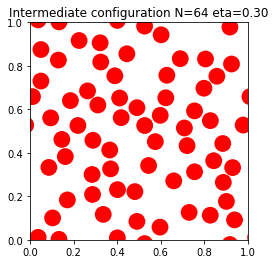

0.122132554356
22 0.28


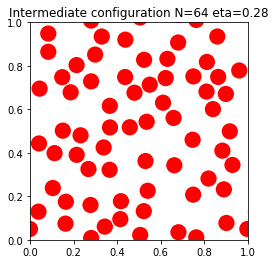

0.11643654168
23 0.26


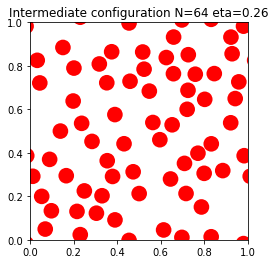

0.114111257345
24 0.24


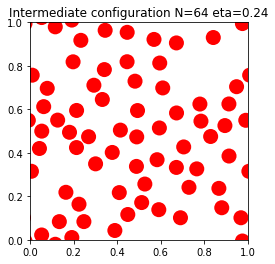

0.11211397161
25 0.22


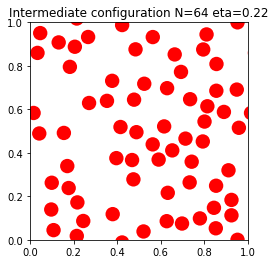

0.124380336859
26 0.2


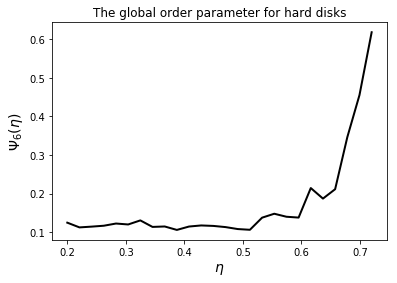

In [110]:
%pylab inline
import random, math, cmath, pylab, os

#Introduce the periodic boundary conditions via the modular distance between two 2D vectors x, y:
def dist(x,y):
    d_x = abs(x[0] - y[0]) % 1.0 #distance between the first compononents of two vectors in modulo 1
    d_x = min(d_x, 1.0 - d_x) #the modular distance is the minimum of cases due to periodicity
    d_y = abs(x[1] - y[1]) % 1.0 #distance between the second compononents of two vectors in modulo 1
    d_y = min(d_y, 1.0 - d_y)
    return  math.sqrt(d_x**2 + d_y**2) #returns the modular Euclidian distance magnitude
def delx_dely(x, y):
    d_x = (x[0] - y[0]) % 1.0
    if d_x > 0.5: d_x -= 1.0
    d_y = (x[1] - y[1]) % 1.0
    if d_y > 0.5: d_y -= 1.0
    return d_x, d_y #returns the modular distance vector

#Define the integer square root function (to use in range() function)
def isqrt(n):
    i = int(math.sqrt(n) + 0.5)
    if i**2 == n:
        return i
    raise ValueError('input was not a perfect square')

def Psi_6(L, eta):
    sigma = math.sqrt(eta / N / math.pi) #radius
    sum_vector = 0j #initialise
    for i in range(N):
        vector  = 0j #initialise
        n_neighbor = 0 #initialise the number of neighbours
        for j in range(N):
            if dist(L[i], L[j]) < 2.8 * sigma and i != j: #neighbour condition
                n_neighbor += 1 #increase the number of neighbours if condition satisfied
                dx, dy = delx_dely(L[j], L[i]) #find the distance between neighbouring disks
#find the angle between x axis and vector (dx,dy) by treating it as a complex number and finding its phase
                angle = cmath.phase(complex(dx, dy)) 
                vector += cmath.exp(6.0j * angle) #the local orientational order parameter
        if n_neighbor > 0:
            vector /= n_neighbor 
        sum_vector += vector #the global order parameter (sum of local order parameters)
    return sum_vector / float(N)

#markov-chain sampling for 4 hard disks with periodic boundary conditions
def markov_disks(L, delta, eta):
    sigma = math.sqrt(eta / N / math.pi) #radius
    condition = True #initialise the condition of overlap as True
    while condition == True:
        a = random.choice(L)
        b = [(a[0] + random.uniform(-delta, delta)) % 1.0, (a[1] + random.uniform(-delta, delta)) % 1.0]
        min_dist = min(dist(b, c) for c in L if c != a)
        if not min_dist < 2.0 * sigma:
            a[:] = b
            condition = False #overlap condition is false, i.e. there is no overlap
            break
    return L

#Inputs of the markov_disks_box function:
N = 64 #number of disks
eta = 0.72 #initial disk density
delta = 0.5 * math.sqrt(eta / N / math.pi)
#Obtain the initial disk configuration L from a file if it exists; otherwise generate it.
filename = 'disk_configuration_N%i_eta%.2f.txt' % (N, eta)
if os.path.isfile(filename): #Returns True if "filename" is an existing regular file.
    f = open(filename, 'r')
    L = []
    for line in f:
        a, b = line.split()
        L.append([float(a), float(b)])
    f.close()
    print 'starting from file', filename
else:
    delxy = 1 / math.sqrt(N) / 2
    L = [[delxy + i * 2 * delxy, delxy + j * 2 * delxy] for i in range(isqrt(N)) for j in range(isqrt(N))]
    print 'starting from a new configuration'
    
n_steps = 10000 #number of steps

#Figure output:
def show_conf(L, eta, title, fname):
    sigma = math.sqrt(eta / N / math.pi) #radius
    pylab.axes()
    for [x, y] in L:
        #the following loops generate 6 disks on a square grid to implement periodic boundary conditions
        for ix in range(-1, 2):
            for iy in range(-1, 2):
                cir = pylab.Circle((x + ix, y + iy), radius=sigma,  fc='r')
                pylab.gca().add_patch(cir)
    pylab.axis('scaled')
    pylab.title(title)
    pylab.axis([0.0, 1.0, 0.0, 1.0])
    #pylab.savefig(fname)
    pylab.show()
    pylab.close()   
    
del_eta = 0.02 #the amount the density is reduced after each run

condition_eta = False #the condition that eta is greater than or equal to 0.2
run = 0  
Psi = []

while condition_eta == False:
    n_avg = 0
    Psi_avg = 0
    run += 1
    #draw the intermediate configuration
    show_conf(L, eta, 'Intermediate configuration N=%i eta=%.2f' % (N, eta), 'filename.png') 
    for step in range(n_steps):
        #pylab.clf()
        #show_conf(L, sigma, 'Sample Configuration', 'disks.png')
        markov_disks(L, delta, eta)    
        #Calculate the absolute value of the complex order parameter at each 100 steps:
        if round(step / 100) == step / 100:
            n_avg += 1
            Psi_avg += abs(Psi_6(L, eta))
    Psi.append(Psi_avg / n_avg) 
    print Psi_avg / n_avg
    
    eta -= del_eta #Reduce the density by a small amount after each run;
    print run, eta #print the current run number
    if eta <= 0.2: #if eta is less than 0.2, then break
        conditon_eta = True
        break
        
    #Write the final configuration on a file:
    filename = 'disk_configuration_N%i_eta%.2f.txt' % (N, eta)
    f = open(filename, 'w')
    for a in L:
       f.write(str(a[0]) + ' ' + str(a[1]) + '\n')
    f.close()

#Plot of the average of |Psi_6| as function of the density eta
x = pylab.linspace(0.72, 0.2, len(Psi))
pylab.plot(x, Psi, 'black', linewidth=2.0)
pylab.grid()
pylab.xlabel('$\eta$', fontsize=14)
pylab.ylabel('$\Psi_6(\eta)$', fontsize=14)
pylab.title('The global order parameter for hard disks')
pylab.savefig('global-order_parameter_disks.png')
pylab.show()

One can see that a phase transition between solid and liquid phases occurs around the density value $\eta\approx 0.72$.

### *Freezing*
Let us try freezing:

Populating the interactive namespace from numpy and matplotlib
starting from a new configuration


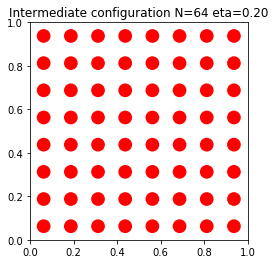

0.110192184952
1 0.22


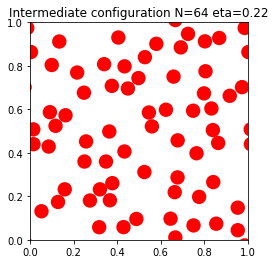

0.103126547803
2 0.24


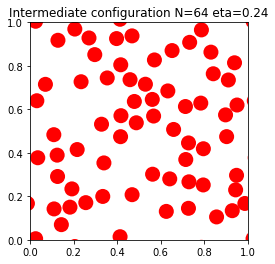

0.115872528698
3 0.26


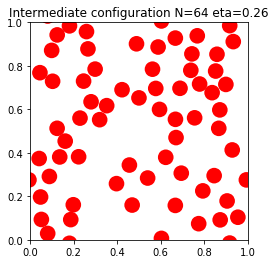

0.111810623833
4 0.28


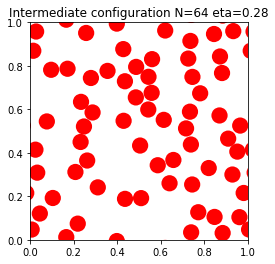

0.113367589093
5 0.3


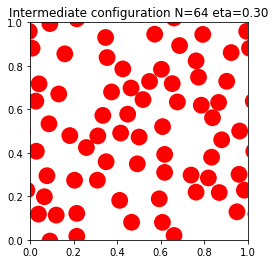

0.12707183506
6 0.32


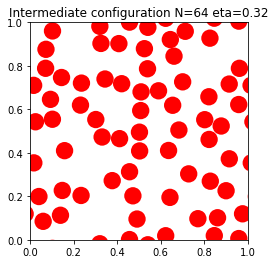

0.108127489471
7 0.34


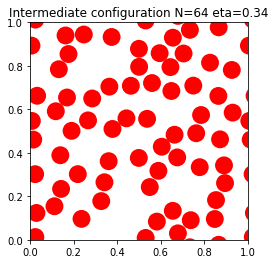

0.109714807171
8 0.36


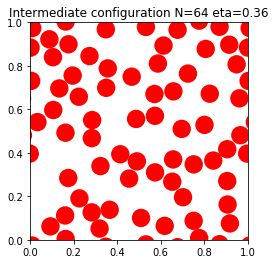

0.130765017828
9 0.38


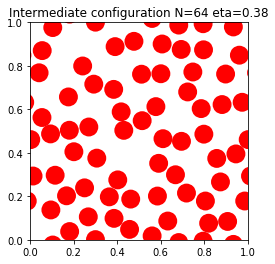

0.117429276029
10 0.4


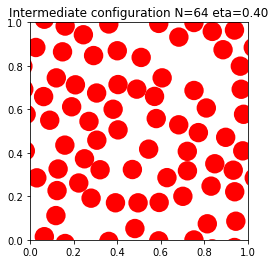

0.1225956798
11 0.42


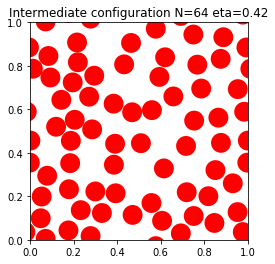

0.103892609106
12 0.44


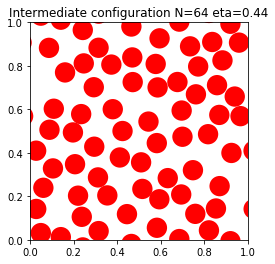

0.117751427915
13 0.46


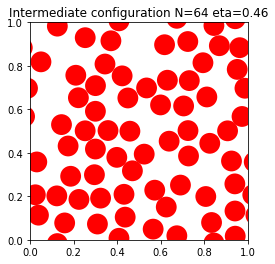

0.113918221247
14 0.48


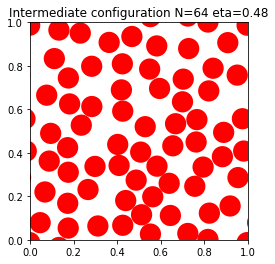

0.111226156716
15 0.5


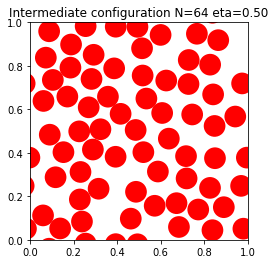

0.0968240163039
16 0.52


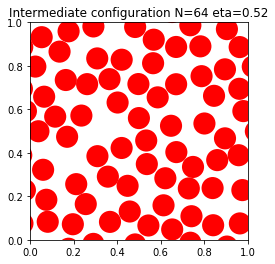

0.102948704201
17 0.54


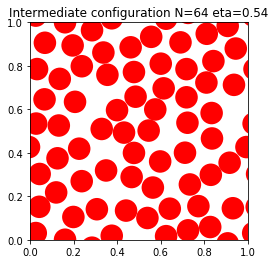

0.112601080953
18 0.56


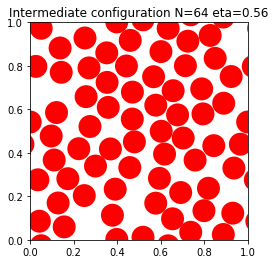

0.121531143392
19 0.58


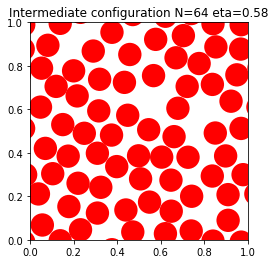

0.132821758
20 0.6


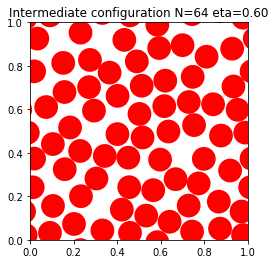

0.130392426036
21 0.62


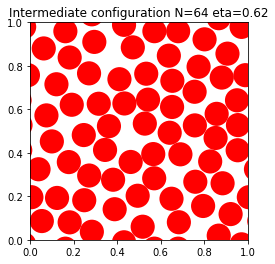

0.149094612004
22 0.64


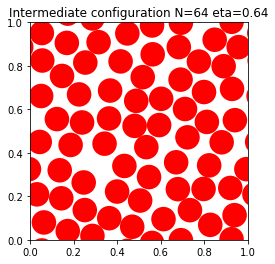

0.181211259479
23 0.66


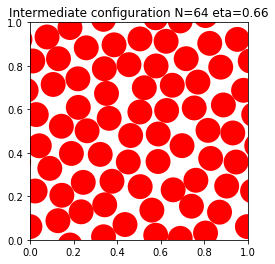

0.155479027132
24 0.68


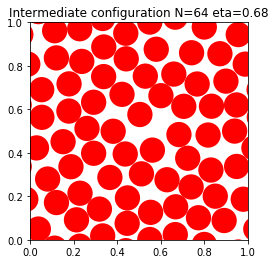

0.191881418157
25 0.7


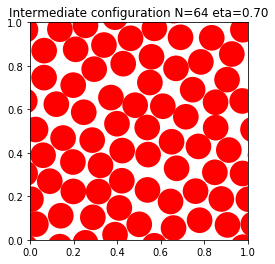

0.176332704701
26 0.72


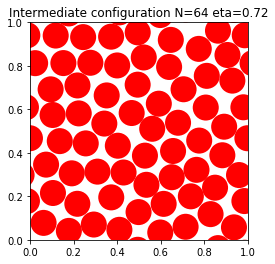

0.141355727878
27 0.74


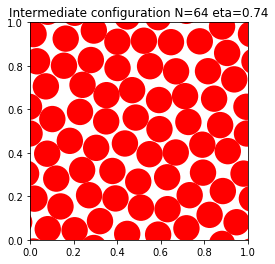

0.203820662475
28 0.76


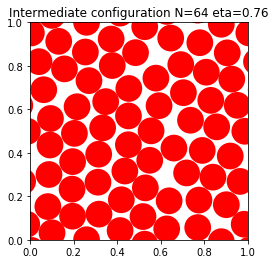

0.468862271947
29 0.78


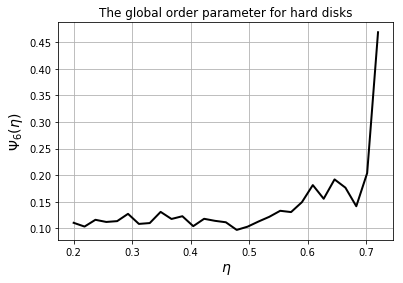

In [112]:
%pylab inline
import random, math, cmath, pylab, os

#Introduce the periodic boundary conditions via the modular distance between two 2D vectors x, y:
def dist(x,y):
    d_x = abs(x[0] - y[0]) % 1.0 #distance between the first compononents of two vectors in modulo 1
    d_x = min(d_x, 1.0 - d_x) #the modular distance is the minimum of cases due to periodicity
    d_y = abs(x[1] - y[1]) % 1.0 #distance between the second compononents of two vectors in modulo 1
    d_y = min(d_y, 1.0 - d_y)
    return  math.sqrt(d_x**2 + d_y**2) #returns the modular Euclidian distance magnitude
def delx_dely(x, y):
    d_x = (x[0] - y[0]) % 1.0
    if d_x > 0.5: d_x -= 1.0
    d_y = (x[1] - y[1]) % 1.0
    if d_y > 0.5: d_y -= 1.0
    return d_x, d_y #returns the modular distance vector

#Define the integer square root function (to use in range() function)
def isqrt(n):
    i = int(math.sqrt(n) + 0.5)
    if i**2 == n:
        return i
    raise ValueError('input was not a perfect square')

def Psi_6(L, eta):
    sigma = math.sqrt(eta / N / math.pi) #radius
    sum_vector = 0j #initialise
    for i in range(N):
        vector  = 0j #initialise
        n_neighbor = 0 #initialise the number of neighbours
        for j in range(N):
            if dist(L[i], L[j]) < 2.8 * sigma and i != j: #neighbour condition
                n_neighbor += 1 #increase the number of neighbours if condition satisfied
                dx, dy = delx_dely(L[j], L[i]) #find the distance between neighbouring disks
#find the angle between x axis and vector (dx,dy) by treating it as a complex number and finding its phase
                angle = cmath.phase(complex(dx, dy)) 
                vector += cmath.exp(6.0j * angle) #the local orientational order parameter
        if n_neighbor > 0:
            vector /= n_neighbor 
        sum_vector += vector #the global order parameter (sum of local order parameters)
    return sum_vector / float(N)

#markov-chain sampling for 4 hard disks with periodic boundary conditions
def markov_disks(L, delta, eta):
    sigma = math.sqrt(eta / N / math.pi) #radius
    condition = True #initialise the condition of overlap as True
    while condition == True:
        a = random.choice(L)
        b = [(a[0] + random.uniform(-delta, delta)) % 1.0, (a[1] + random.uniform(-delta, delta)) % 1.0]
        min_dist = min(dist(b, c) for c in L if c != a)
        if not min_dist < 2.0 * sigma:
            a[:] = b
            condition = False #overlap condition is false, i.e. there is no overlap
            break
    return L

#Inputs of the markov_disks_box function:
N = 64 #number of disks
eta = 0.2 #initial disk density
delta = 0.5 * math.sqrt(eta / N / math.pi)
#Obtain the initial disk configuration L from a file if it exists; otherwise generate it.
filename = 'disk_configuration_N%i_eta%.2f.txt' % (N, eta)
if os.path.isfile(filename): #Returns True if "filename" is an existing regular file.
    f = open(filename, 'r')
    L = []
    for line in f:
        a, b = line.split()
        L.append([float(a), float(b)])
    f.close()
    print 'starting from file', filename
else:
    delxy = 1 / math.sqrt(N) / 2
    L = [[delxy + i * 2 * delxy, delxy + j * 2 * delxy] for i in range(isqrt(N)) for j in range(isqrt(N))]
    print 'starting from a new configuration'
    
n_steps = 10000 #number of steps

#Figure output:
def show_conf(L, eta, title, fname):
    sigma = math.sqrt(eta / N / math.pi) #radius
    pylab.axes()
    for [x, y] in L:
        #the following loops generate 6 disks on a square grid to implement periodic boundary conditions
        for ix in range(-1, 2):
            for iy in range(-1, 2):
                cir = pylab.Circle((x + ix, y + iy), radius=sigma,  fc='r')
                pylab.gca().add_patch(cir)
    pylab.axis('scaled')
    pylab.title(title)
    pylab.axis([0.0, 1.0, 0.0, 1.0])
    #pylab.savefig(fname)
    pylab.show()
    pylab.close()   
    
del_eta = 0.02 #the amount the density is reduced after each run

condition_eta = False #the condition that eta is greater than or equal to 0.2
run = 0  
Psi = []

while condition_eta == False:
    n_avg = 0
    Psi_avg = 0
    run += 1
    #draw the intermediate configuration
    show_conf(L, eta, 'Intermediate configuration N=%i eta=%.2f' % (N, eta), 'filename.png') 
    for step in range(n_steps):
        #pylab.clf()
        #show_conf(L, sigma, 'Sample Configuration', 'disks.png')
        markov_disks(L, delta, eta)    
        #Calculate the absolute value of the complex order parameter at each 100 steps:
        if round(step / 100) == step / 100:
            n_avg += 1
            Psi_avg += abs(Psi_6(L, eta))
    Psi.append(Psi_avg / n_avg) 
    print Psi_avg / n_avg
    
    eta += del_eta #Reduce the density by a small amount after each run;
    print run, eta #print the current run number
    if eta >= 0.77: #if eta is less than 0.2, then break
        conditon_eta = True
        break
        
    #Write the final configuration on a file:
    filename = 'disk_configuration_N%i_eta%.2f.txt' % (N, eta)
    f = open(filename, 'w')
    for a in L:
       f.write(str(a[0]) + ' ' + str(a[1]) + '\n')
    f.close()

#Plot of the average of |Psi_6| as function of the density eta
x = pylab.linspace(0.2, 0.72, len(Psi))
pylab.plot(x, Psi, 'black', linewidth=2.0)
pylab.grid()
pylab.xlabel('$\eta$', fontsize=14)
pylab.ylabel('$\Psi_6(\eta)$', fontsize=14)
pylab.title('The global order parameter for hard disks')
pylab.savefig('global-order_parameter_disks.png')
pylab.show()